In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from functions.rk2 import rk2

# Constants

In [280]:
## ASSUMPTIONS 
rho = 4.85*10**-3 ## kg/m^3
Cd = .5 ## unitless
m = 77 ## kg
D = 1 ## m
yboost = -50 ## m/s

## KNOWNS
g = .113 ## m/s
h = 35 ## km
h = 35000 ## m
rp = 287100 ## m
ra = 478500 ## m
re = 252100 ## m
vp = 177.2 ## m/s
va = 106.3 ## m/s
epsilon = .25 ## unitless
Cl = ra*(1-epsilon) # m

In [276]:
def totalforce(r, t):
    x = r[0]
    y = r[1]
    xdot = r[2]
    ydot = r[3]
    theta = np.arctan2(ydot,xdot)
    A = np.pi*4*D**2
    const = rho/2*Cd*A
    vmag = xdot**2 + ydot**2
    xdotdot = -const*vmag*np.cos(theta)/m
    ydotdot = -1*g - const*vmag*np.sin(theta)/m
    return np.array([xdot,ydot,xdotdot,ydotdot])

# Orbit


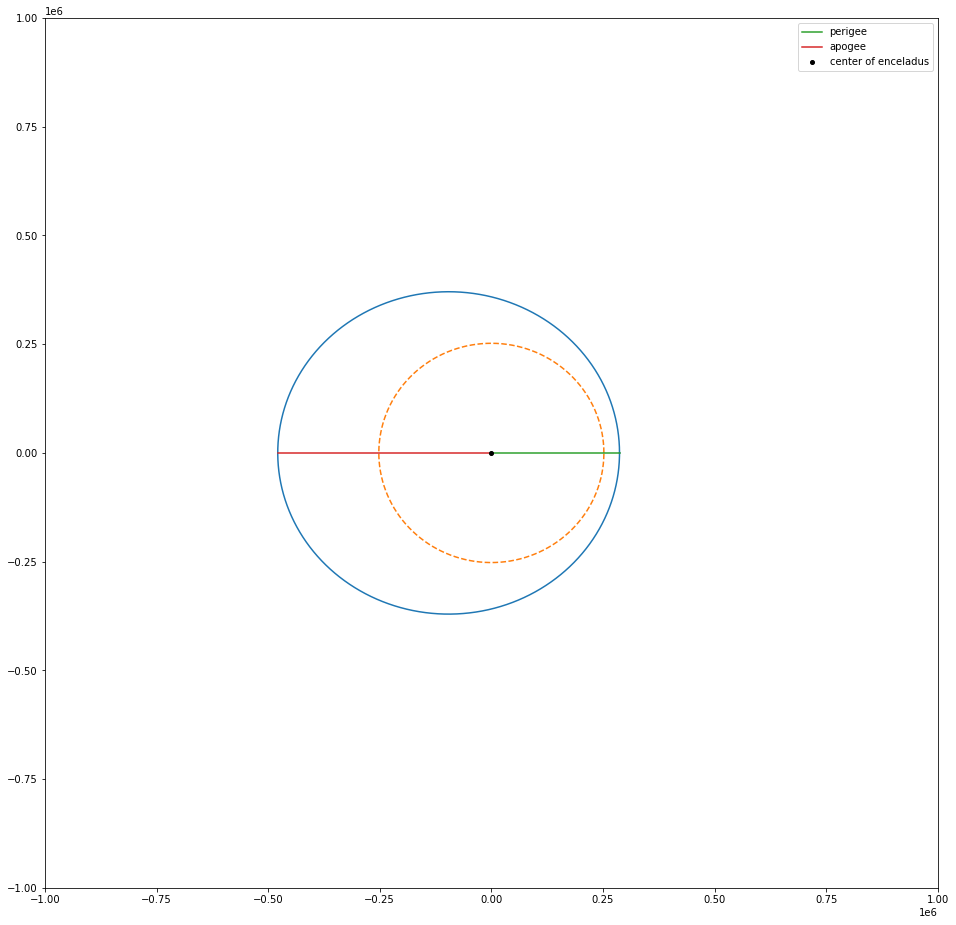

In [244]:
angles = np.linspace(0, 2*np.pi, 10000)
rorbit = Cl/(1+epsilon*np.cos(angles))
xorbit = np.cos(angles)*rorbit
yorbit = np.sin(angles)*rorbit
xencel = np.cos(angles)*re
yencel = np.sin(angles)*re
plt.figure(figsize=(16,16))
plt.plot(xorbit,yorbit, zorder = 1)
plt.plot(xencel,yencel,linestyle = "--",zorder = 2)
plt.xlim(-1000000,1000000)
plt.ylim(-1000000,1000000)
plt.plot([0,rp],[0,0], label = "perigee", zorder = 3)
plt.plot([0,-ra],[0,0], label = "apogee", zorder = 4)
plt.scatter(0,0, color = "black", s = 16, zorder = 5, label = "center of enceladus")

plt.legend()

# Landing plot

In [261]:
t, rval = rk2([1000, rp-re, vp, -100], 0, 2000, .1, totalforce)
# ind = np.where(rval[:,1]>=re)
# t = t[ind]
# rval = rval[ind]

-14133.675066297776 252100


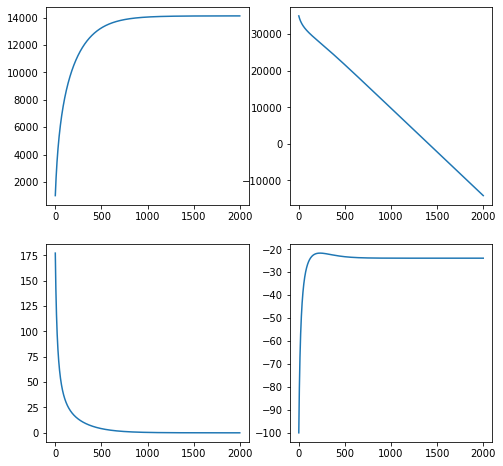

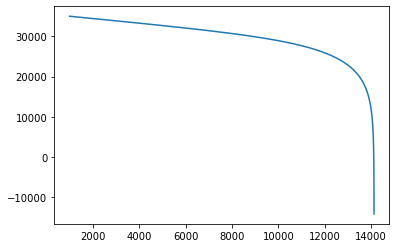

In [262]:
plt.subplots(2,2, figsize = (8,8))
plt.subplot(2,2,1)
plt.plot(t,rval[:,0])
plt.subplot(2,2,2)
plt.plot(t,rval[:,1])
print(min(rval[:,1]), re)
plt.subplot(2,2,3)
plt.plot(t,rval[:,2])
plt.subplot(2,2,4)
plt.plot(t,rval[:,3])
plt.figure()
plt.plot(rval[:,0], rval[:,1])

In [245]:
vterminal = np.sqrt(g*m/(rho/2*Cd*A))
print(vterminal)

23.89674661756611


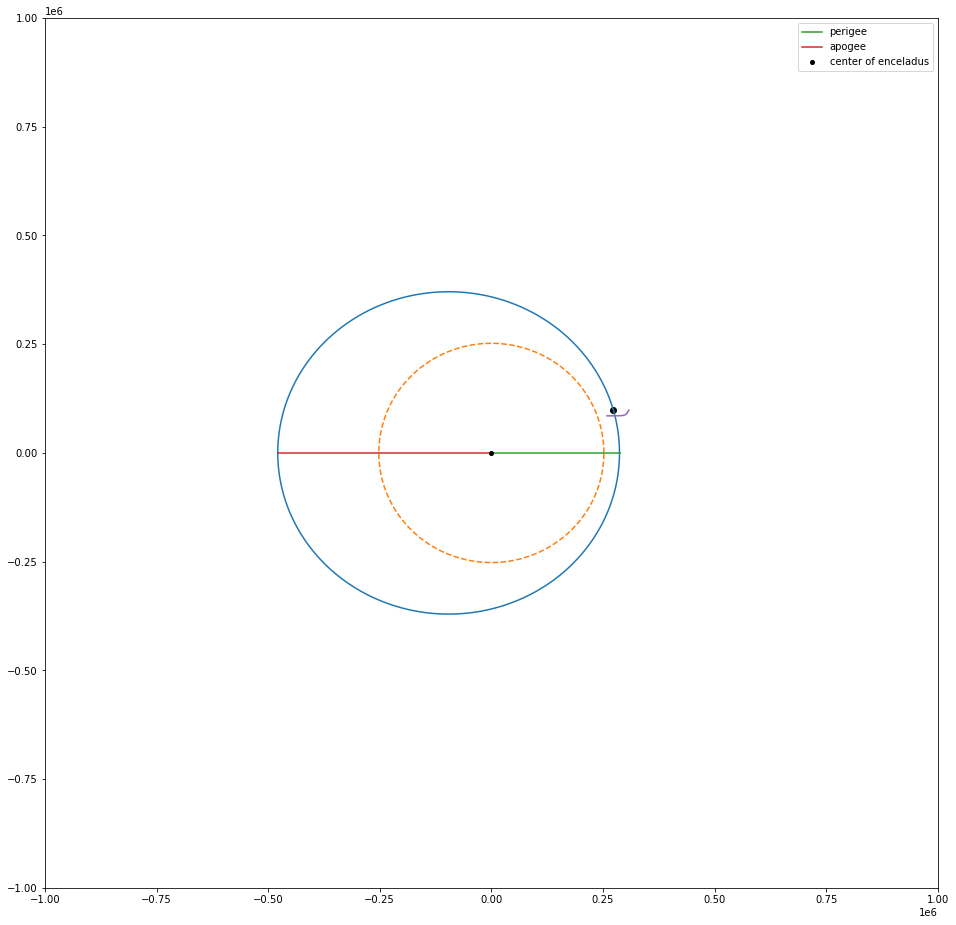

In [266]:
#main pic
plt.figure(figsize=(16,16))
plt.plot(xorbit,yorbit, zorder = 1)
plt.plot(xencel,yencel,linestyle = "--",zorder = 2)
plt.xlim(-1000000,1000000)
plt.ylim(-1000000,1000000)
plt.plot([0,rp],[0,0], label = "perigee", zorder = 3)
plt.plot([0,-ra],[0,0], label = "apogee", zorder = 4)
plt.scatter(0,0, color = "black", s = 16, zorder = 5, label = "center of enceladus")
plt.legend()

#orbiter launch location
ang = np.pi/180*20
rloc = Cl/(1+epsilon*np.cos(ang))
xloc = rloc*np.cos(ang)
yloc = rloc*np.sin(ang)
plt.scatter(xloc,yloc, color = "black")

#path
#rotatecoords = (rval[:,1], rval[:,0]*-1)
#rpathx = rotatecoords[0] + xloc
#rpathy = rotatecoords[1] + yloc
#plt.plot(rpathx, rpathy)

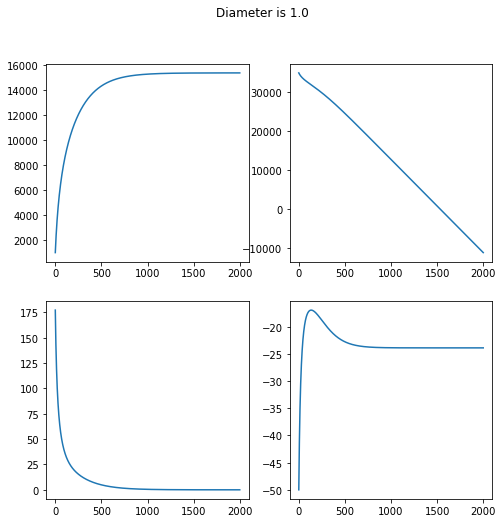

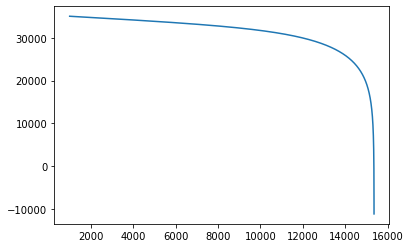

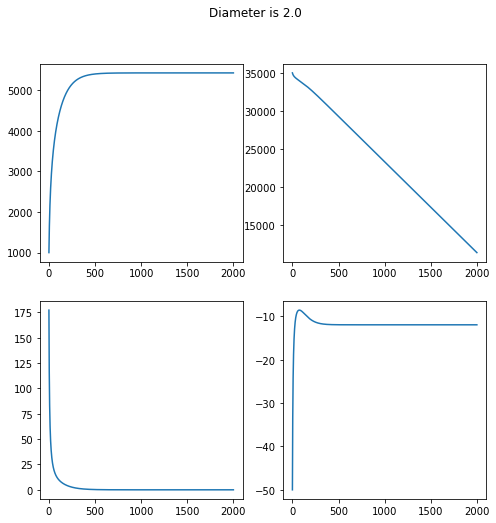

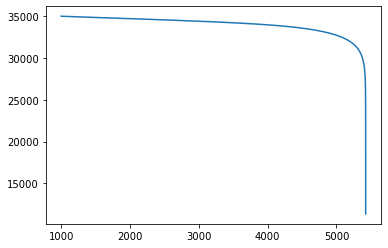

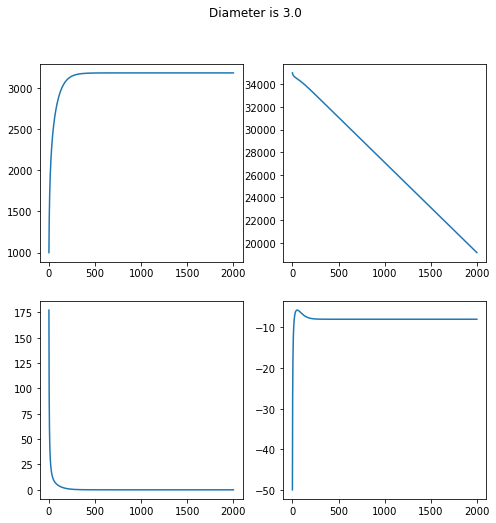

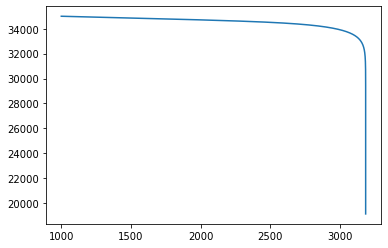

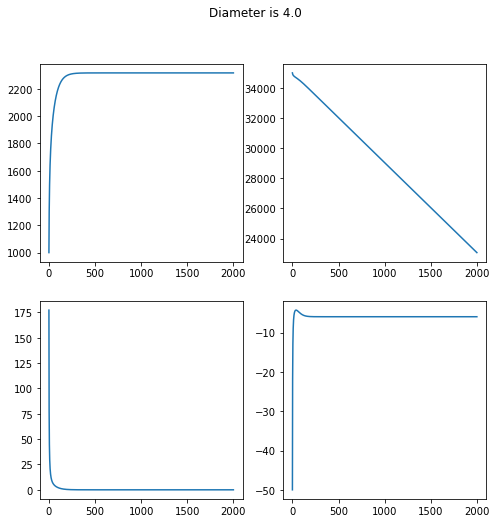

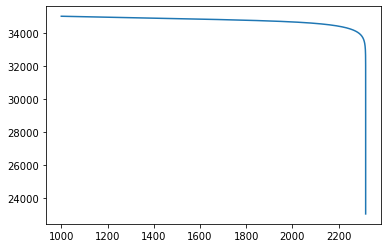

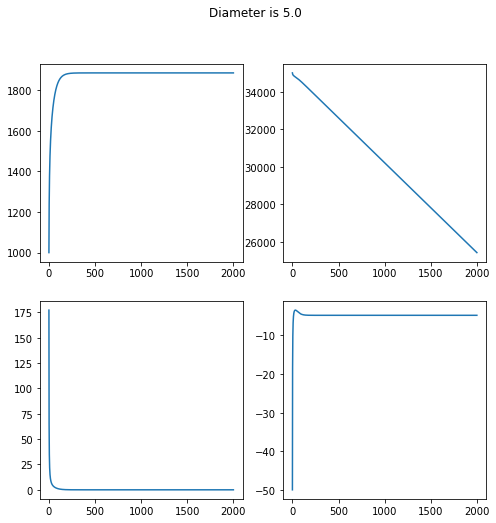

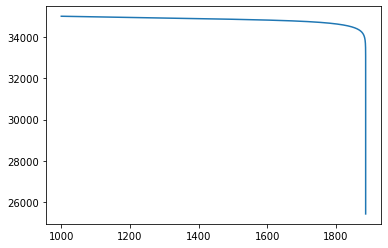

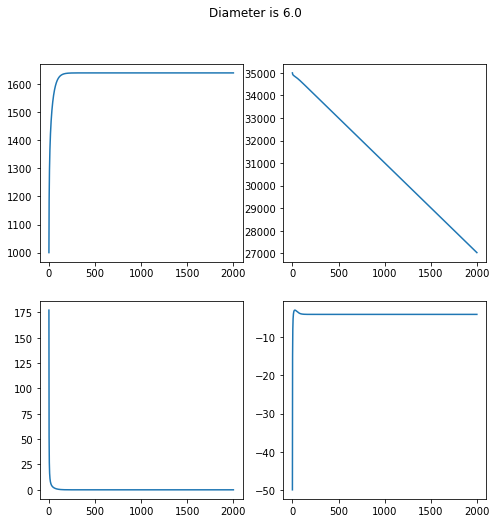

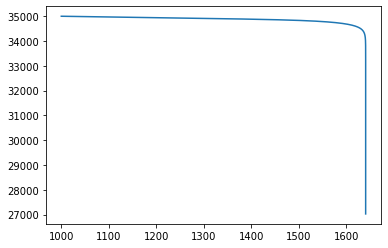

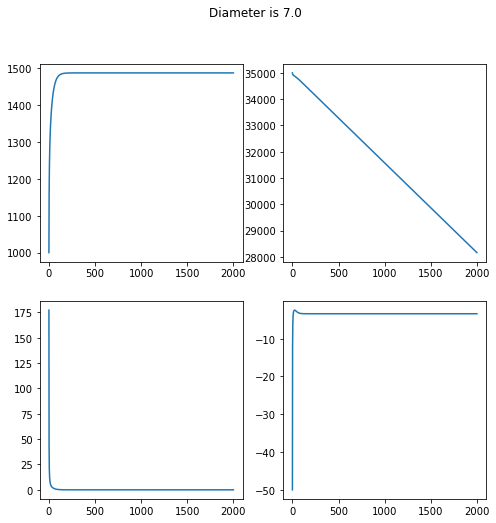

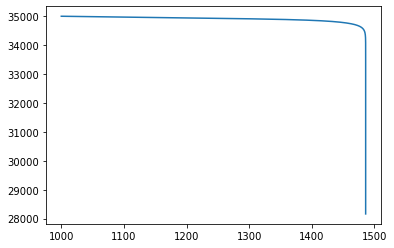

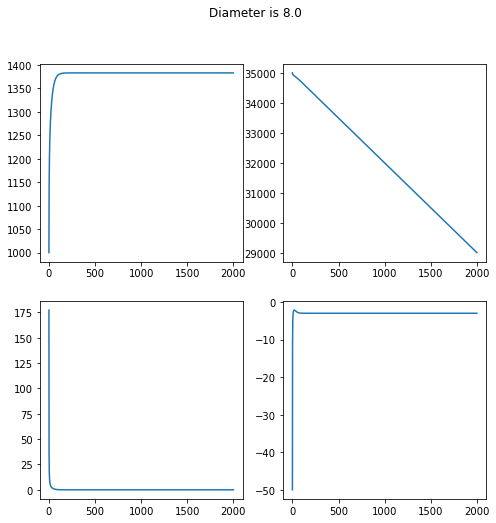

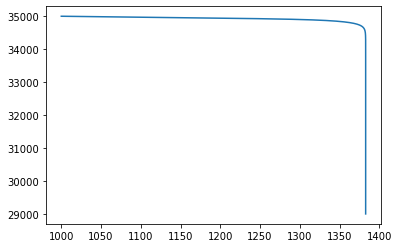

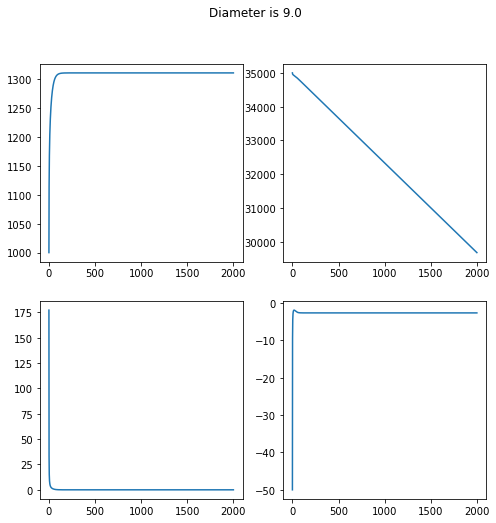

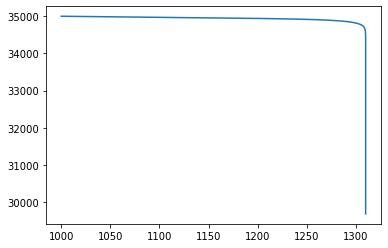

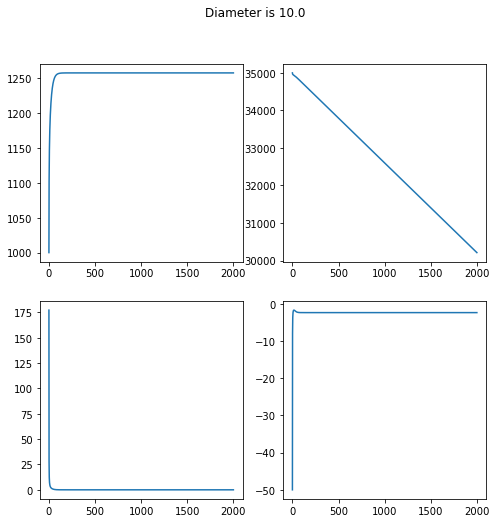

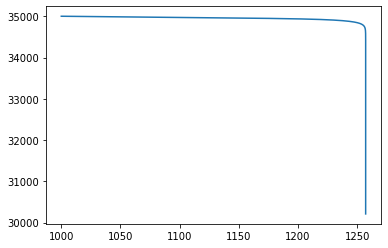

In [281]:
for D in np.linspace(1,10, num = 10):
    A = np.pi*4*D**2
    t, rval = rk2([1000, rp-re, vp, yboost], 0, 2000, .1, totalforce)
    plt.subplots(2,2, figsize = (8,8))
    plt.suptitle("Diameter is " + str(D))
    plt.subplot(2,2,1)
    plt.plot(t,rval[:,0])
    plt.subplot(2,2,2)
    plt.plot(t,rval[:,1])
    plt.subplot(2,2,3)
    plt.plot(t,rval[:,2])
    plt.subplot(2,2,4)
    plt.plot(t,rval[:,3])
    plt.figure()
    plt.plot(rval[:,0], rval[:,1])